In [43]:
from diffusers import StableDiffusionInpaintPipeline
import torch 

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    # "diffusers/stable-diffusion-xl-1.0-inpainting-0.1",
    torch_dtype=torch.float32,
)
pipe.to("cuda")


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

StableDiffusionInpaintPipeline {
  "_class_name": "StableDiffusionInpaintPipeline",
  "_diffusers_version": "0.32.1",
  "_name_or_path": "stabilityai/stable-diffusion-2-inpainting",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [4]:
# load /home/azhuravl/work/TrajectoryCrafter/notebooks/14_09_25/image_dog.png and /home/azhuravl/work/TrajectoryCrafter/notebooks/14_09_25/mask_dog.png
from PIL import Image
image = Image.open("/home/azhuravl/work/TrajectoryCrafter/notebooks/14_09_25/image_dog.png").convert("RGB")
mask_image = Image.open("/home/azhuravl/work/TrajectoryCrafter/notebooks/14_09_25/mask_dog.png").convert("RGB")
prompt = "Yellow cat, high resolution, sitting on the ground"



In [ ]:
image_inpainted = pipe(prompt=prompt, image=image, mask_image=mask_image).images[0]
# show it
# image_inpainted.show()


  0%|          | 0/50 [00:00<?, ?it/s]

Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)
Unable to connect to VS Code server: Error in request.
Error: connect ENOENT /run/user/24894/vscode-ipc-c2724542-3de9-4595-9f6d-6e3ef795533f.sock
    at PipeConnectWrap.afterConnect [as oncomplete] (node:net:1611:16) {
  errno: -2,
  code: 'ENOENT',
  syscall: 'connect',
  address: '/run/user/24894/vscode-ipc-c2724542-3de9-4595-9f6d-6e3ef795533f.sock'
}
Unable to connect to VS Code server: Error in request.
Error: connect ENOENT /run/user/24894/vscode-ipc-c2724542-3de9-4595-9f6d-6e3ef795533f.sock
    at PipeConnectWrap.afterConnect [as oncomplete] (node:net:1611:16) {
  errno: -2,
  code: 'ENOENT',
  syscall: 'connect',
  address: '/run/user/24894/vscode-ipc-c2724542-3de9-4595-9f6d-6e3ef795533f.sock'
}
xdg-open: no method available for opening '/tmp/tmp2m2aee12.PNG'


Mask shape: (672, 384)
Black pixels found: 16653 pixels
Percentage of image to inpaint: 6.5%


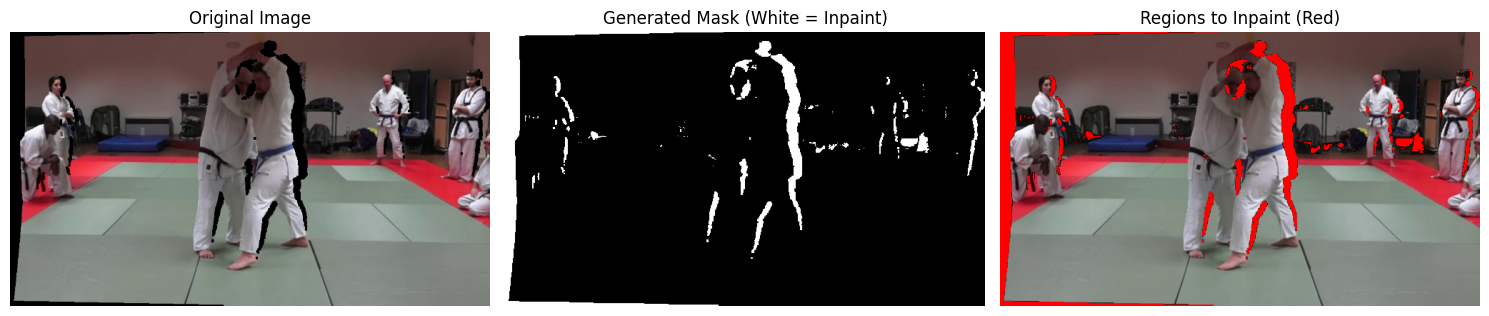

In [60]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load your image
# image = Image.open("/home/azhuravl/work/TrajectoryCrafter/experiments/10-09-2025/mvtracker_2to7_20250910_1459/render_basketball/frame_00001.png").convert("RGB")
# image = Image.open("/home/azhuravl/work/TrajectoryCrafter/experiments/10-09-2025/1941_mvtracker_4to5/render_1/frame_00001.png").convert("RGB")
image = Image.open("/home/azhuravl/work/TrajectoryCrafter/experiments/31-08-2025/judo_20250830_1717_right_90_r0.0/render/frame_00002.png").convert("RGB")

# Convert to numpy array
image_array = np.array(image)

# Create mask for black regions
# Black pixels have RGB values close to (0, 0, 0)
# You can adjust the threshold if needed/home/azhuravl/work/TrajectoryCrafter/notebooks/14_09_25/image_panoptic_studio.png
threshold = 10  # Adjust this value if needed (0-255)

# Create mask where black regions are white (255) and non-black regions are black (0)
# This is the format expected by inpainting models
mask = np.all(image_array <= threshold, axis=2)  # True for black regions
mask_array = mask.astype(np.uint8) * 255  # Convert to 0-255 range

# Convert back to PIL Image
mask_image = Image.fromarray(mask_array)

# Visualize the original image, generated mask, and what will be inpainted
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(image)
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(mask_image, cmap='gray')
axs[1].set_title("Generated Mask (White = Inpaint)")
axs[1].axis("off")

# Show what regions will be inpainted (overlay mask on original)
overlay = image_array.copy()
overlay[mask] = [255, 0, 0]  # Red color for regions to be inpainted
axs[2].imshow(overlay)
axs[2].set_title("Regions to Inpaint (Red)")
axs[2].axis("off")

plt.tight_layout()

print(f"Mask shape: {mask_image.size}")
print(f"Black pixels found: {np.sum(mask)} pixels")
print(f"Percentage of image to inpaint: {(np.sum(mask) / mask.size) * 100:.1f}%")

In [62]:
# prompt = "A person standing in a multi-view capturing studio, high resolution"
# prompt = (
#     "A realistic scene of household objects placed on a sunlit outdoor surface: "
#     "a shoe, a cereal box, a chair, and a smartphone lie naturally on the ground. "
#     "The objects are complete, clearly visible, and correctly positioned with proper shadows. "
#     "High-resolution and photorealistic, with no floating or distorted elements."
# )

prompt = (
    "Two people in white judo uniforms practicing a grappling move on green tatami mats. "
    "They are barefoot and standing close together in a dojo. "
    "Other people in judo uniforms are observing around the mat. "
    "The background shows gym equipment. Realistic lighting and clean composition."
)



image_inpainted = pipe(prompt=prompt, image=image, mask_image=mask_image).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

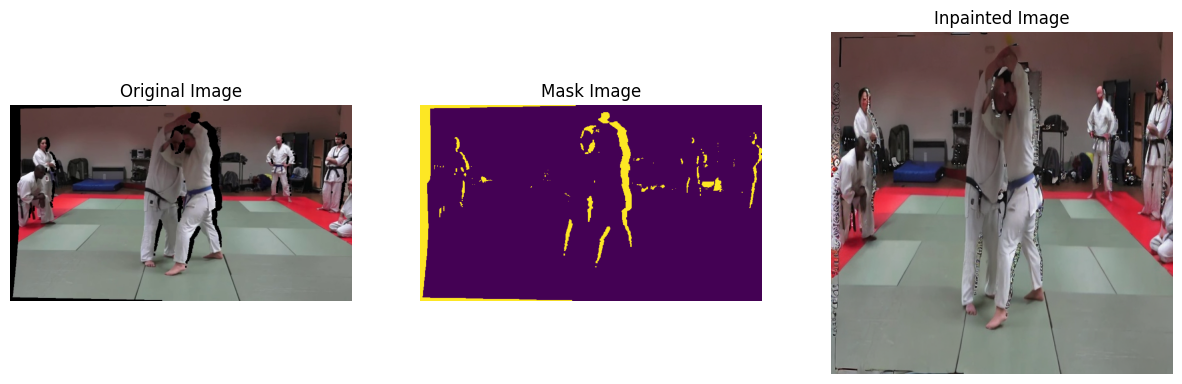

In [63]:
# show the original image, mask, and inpainted image side by side
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image)
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(mask_image)
axs[1].set_title("Mask Image")
axs[1].axis("off")

axs[2].imshow(image_inpainted)
axs[2].set_title("Inpainted Image")
axs[2].axis("off")

plt.show()

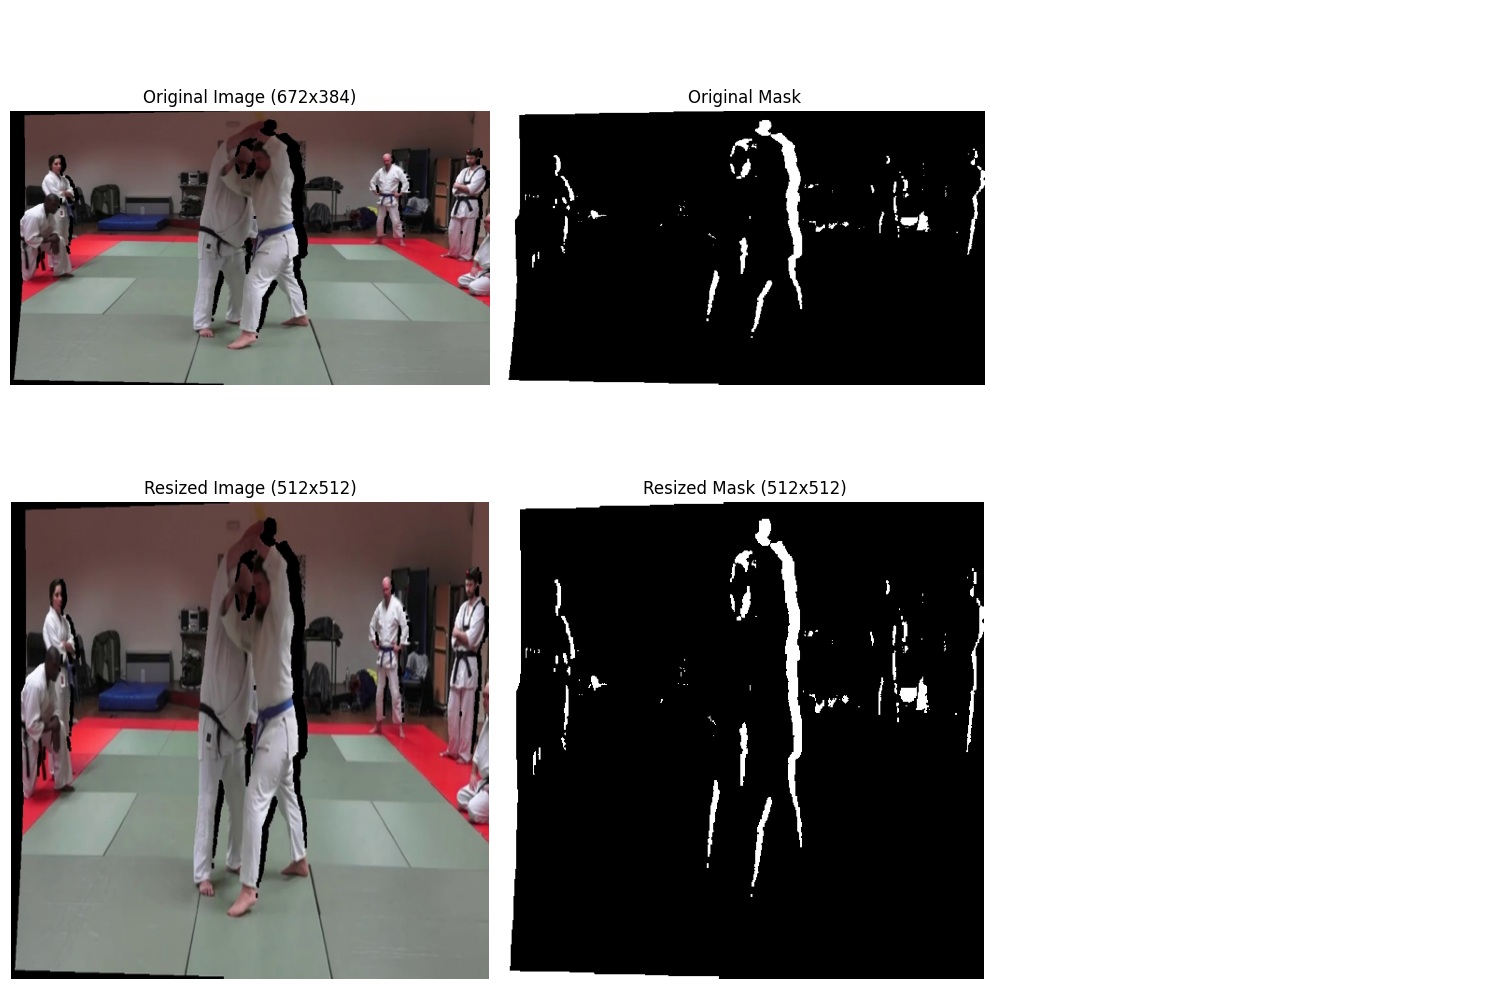

Original size: (672, 384)
Resized size: (512, 512)


In [64]:
# Resize image and mask to 512x512
image_resized = image.resize((512, 512), Image.LANCZOS)
mask_image_resized = mask_image.resize((512, 512), Image.LANCZOS)

# Convert mask back to binary (0 or 255) after resizing
mask_array_resized = np.array(mask_image_resized)
mask_binary = (mask_array_resized > 127).astype(np.uint8) * 255
mask_image_resized = Image.fromarray(mask_binary)

# Visualize the resized versions
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Original size
axs[0, 0].imshow(image)
axs[0, 0].set_title(f"Original Image ({image.size[0]}x{image.size[1]})")
axs[0, 0].axis("off")

axs[0, 1].imshow(mask_image, cmap='gray')
axs[0, 1].set_title("Original Mask")
axs[0, 1].axis("off")

# Resized versions
axs[1, 0].imshow(image_resized)
axs[1, 0].set_title("Resized Image (512x512)")
axs[1, 0].axis("off")

axs[1, 1].imshow(mask_image_resized, cmap='gray')
axs[1, 1].set_title("Resized Mask (512x512)")
axs[1, 1].axis("off")

# Hide empty subplots
axs[0, 2].axis("off")
axs[1, 2].axis("off")

plt.tight_layout()
plt.show()

print(f"Original size: {image.size}")
print(f"Resized size: {image_resized.size}")

  0%|          | 0/50 [00:00<?, ?it/s]

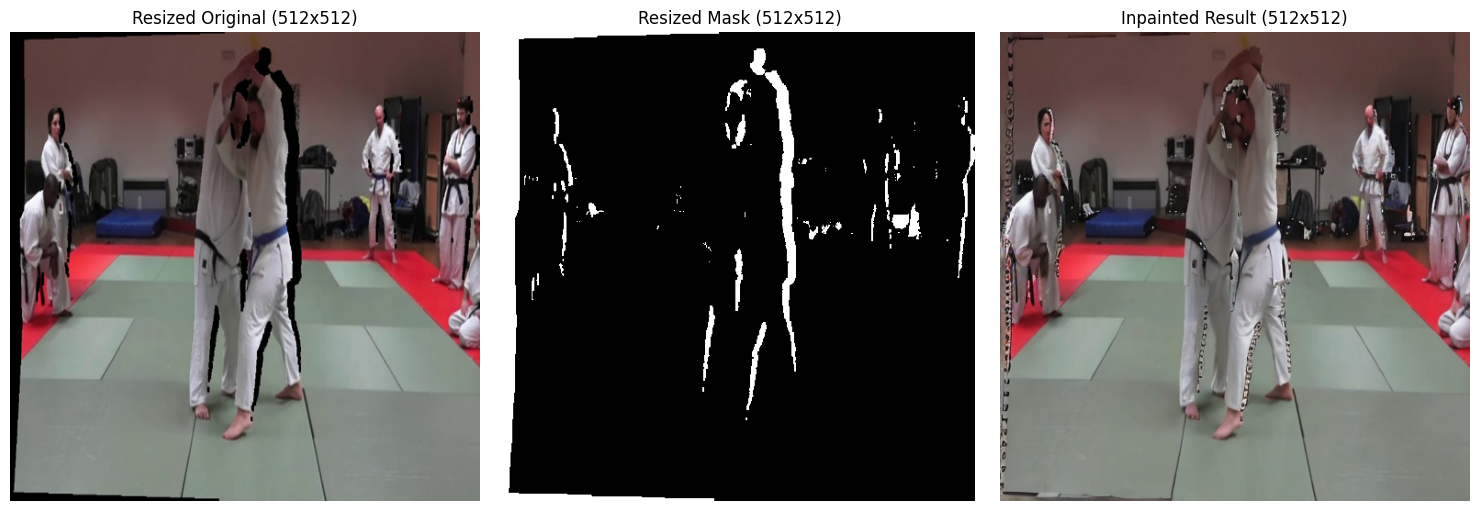

In [65]:
# prompt = "A person standing in a multi-view capturing studio, high resolution"

# Use the resized images
image_inpainted = pipe(
    prompt=prompt, 
    image=image_resized, 
    mask_image=mask_image_resized
).images[0]

# Show results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(image_resized)
axs[0].set_title("Resized Original (512x512)")
axs[0].axis("off")

axs[1].imshow(mask_image_resized, cmap='gray')
axs[1].set_title("Resized Mask (512x512)")
axs[1].axis("off")

axs[2].imshow(image_inpainted)
axs[2].set_title("Inpainted Result (512x512)")
axs[2].axis("off")

plt.tight_layout()
plt.show()

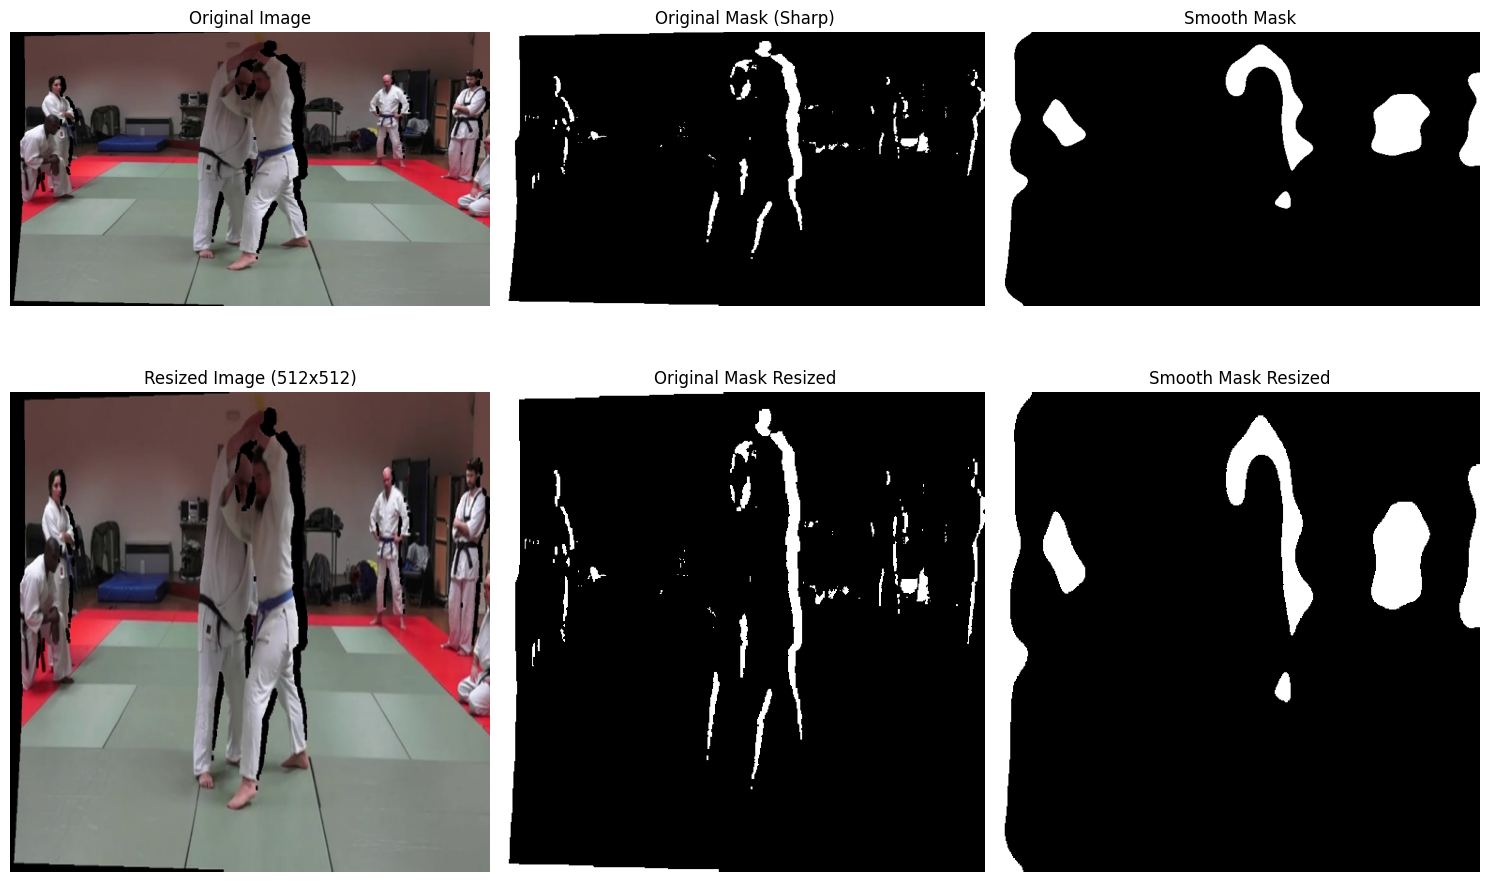

In [70]:
import cv2
from scipy import ndimage

def create_smooth_mask(image, threshold=10, blur_radius=5, dilate_iterations=2, erode_iterations=1):
    """Create a smooth mask for black regions"""
    image_array = np.array(image)
    
    # Create initial binary mask
    mask = np.all(image_array <= threshold, axis=2)
    mask_uint8 = mask.astype(np.uint8)
    
    # Apply morphological operations to clean up the mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    
    # Dilate to fill small gaps
    if dilate_iterations > 0:
        mask_uint8 = cv2.dilate(mask_uint8, kernel, iterations=dilate_iterations)
    
    # Erode to remove noise
    if erode_iterations > 0:
        mask_uint8 = cv2.erode(mask_uint8, kernel, iterations=erode_iterations)
    
    # Apply Gaussian blur for smooth edges
    mask_blurred = cv2.GaussianBlur(mask_uint8.astype(np.float32), 
                                   (blur_radius*2+1, blur_radius*2+1), 
                                   blur_radius/2)
    
    # Convert back to binary (0 or 255)
    mask_smooth = (mask_blurred > 0.5).astype(np.uint8) * 255
    
    return Image.fromarray(mask_smooth)

# Create smooth mask
mask_image_smooth = create_smooth_mask(image, threshold=10, blur_radius=20, 
                                      dilate_iterations=10, erode_iterations=10)

# Resize to 512x512
image_resized = image.resize((512, 512), Image.LANCZOS)
mask_image_smooth_resized = mask_image_smooth.resize((512, 512), Image.LANCZOS)

# Ensure binary after resize
mask_array_resized = np.array(mask_image_smooth_resized)
mask_binary = (mask_array_resized > 127).astype(np.uint8) * 255
mask_image_smooth_resized = Image.fromarray(mask_binary)

# Compare original vs smooth mask
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Original mask
axs[0, 0].imshow(image)
axs[0, 0].set_title("Original Image")
axs[0, 0].axis("off")

axs[0, 1].imshow(mask_image, cmap='gray')
axs[0, 1].set_title("Original Mask (Sharp)")
axs[0, 1].axis("off")

axs[0, 2].imshow(mask_image_smooth, cmap='gray')
axs[0, 2].set_title("Smooth Mask")
axs[0, 2].axis("off")

# Resized versions
axs[1, 0].imshow(image_resized)
axs[1, 0].set_title("Resized Image (512x512)")
axs[1, 0].axis("off")

axs[1, 1].imshow(mask_image_resized, cmap='gray')
axs[1, 1].set_title("Original Mask Resized")
axs[1, 1].axis("off")

axs[1, 2].imshow(mask_image_smooth_resized, cmap='gray')
axs[1, 2].set_title("Smooth Mask Resized")
axs[1, 2].axis("off")

plt.tight_layout()
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

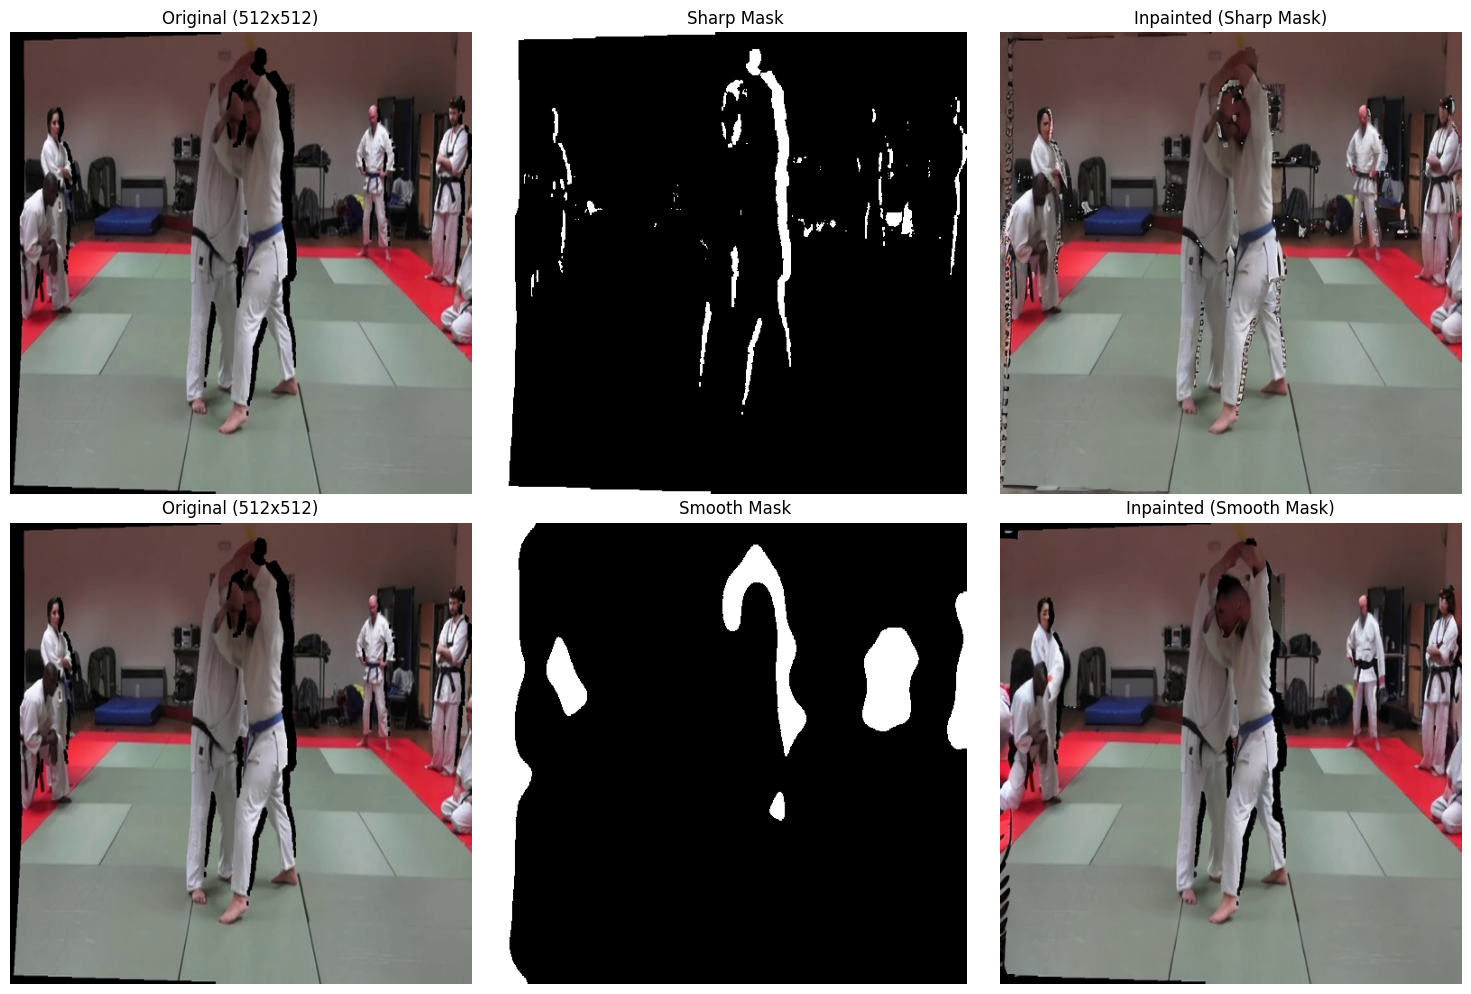

In [71]:
# prompt = (
#     "A person inside a multi-camera motion capture studio, standing on a circular platform, throwing a basketball. There is only one ball"
#     "The walls are beige, arranged in a hexagonal dome pattern. No other people are present. "
#     "The scene is clean, high-resolution, and photorealistic."
# )
negative_prompt = (
    "blurry, low resolution, extra limbs, deformed face, duplicated body parts, studio equipment, tripods, artifacts"
)


# Use the smooth resized mask
image_inpainted_smooth = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    image=image_resized,
    mask_image=mask_image_smooth_resized
).images[0]

# Compare results
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Original sharp mask result
axs[0, 0].imshow(image_resized)
axs[0, 0].set_title("Original (512x512)")
axs[0, 0].axis("off")

axs[0, 1].imshow(mask_image_resized, cmap='gray')
axs[0, 1].set_title("Sharp Mask")
axs[0, 1].axis("off")

axs[0, 2].imshow(image_inpainted)  # Previous result with sharp mask
axs[0, 2].set_title("Inpainted (Sharp Mask)")
axs[0, 2].axis("off")

# Smooth mask result
axs[1, 0].imshow(image_resized)
axs[1, 0].set_title("Original (512x512)")
axs[1, 0].axis("off")

axs[1, 1].imshow(mask_image_smooth_resized, cmap='gray')
axs[1, 1].set_title("Smooth Mask")
axs[1, 1].axis("off")

axs[1, 2].imshow(image_inpainted_smooth)
axs[1, 2].set_title("Inpainted (Smooth Mask)")
axs[1, 2].axis("off")

plt.tight_layout()
plt.show()